   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


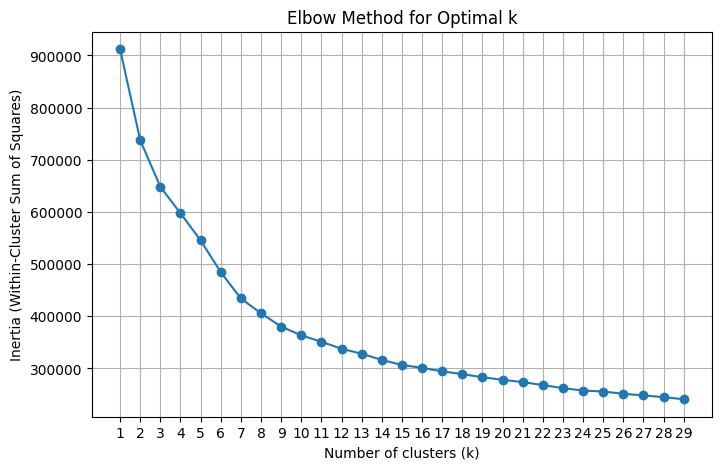

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

df = pd.read_csv('dataset.csv')  

print(df.head())

numerical_features = [
    'danceability', 'energy', 'acousticness',
    'instrumentalness', 'liveness', 'valence',
    'tempo', 'speechiness'
]
df_clean = df.dropna(subset=numerical_features)

df_clean = df_clean.drop_duplicates()


features_for_clustering = df_clean[numerical_features]
X = features_for_clustering


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


inertia = []
k_range = range(1, 30)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

k = 18
kmeans = KMeans(n_clusters=k, random_state=42)
df_clean['cluster'] = kmeans.fit_predict(X_scaled)


cluster_summary = df_clean.groupby('cluster').agg({
    
    'danceability': 'mean',
    'energy': 'mean',
    'acousticness': 'mean',
    'instrumentalness': 'mean'
}).round(2)


cluster_summary.columns = ['_'.join(col) for col in cluster_summary.columns]
cluster_summary = cluster_summary.reset_index()


import pickle

# Load the model
with open('genre_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)
